    Titanic : Machine learning for diaster
    https://www.kaggle.com/rochellesilva/simple-tutorial-for-beginners

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset= pd.read_csv(r'C:\Users\sat\Desktop\Untitled Folder\titanic\train.csv')


In [4]:
%matplotlib inline
import seaborn
seaborn.set() 

Percentage of Class 1 that survived: 63.0 %
Percentage of Class 2 that survived: 47.0 %
Percentage of Class 3 that survived: 24.0 %


,1,2,3
Survived,136,87,119
Died,80,97,372


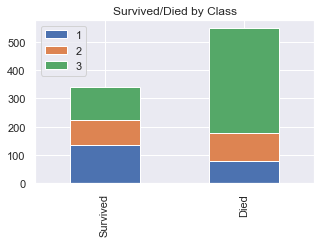

In [5]:
#-------------------Survived/Died by Class -------------------------------------
survived_class = dataset[dataset['Survived']==1]['Pclass'].value_counts()
dead_class = dataset[dataset['Survived']==0]['Pclass'].value_counts()
df_class = pd.DataFrame([survived_class,dead_class])
df_class.index = ['Survived','Died']
df_class.plot(kind='bar',stacked=True, figsize=(5,3), title="Survived/Died by Class")

Class1_survived= df_class.iloc[0,0]/df_class.iloc[:,0].sum()*100
Class2_survived = df_class.iloc[0,1]/df_class.iloc[:,1].sum()*100
Class3_survived = df_class.iloc[0,2]/df_class.iloc[:,2].sum()*100
print("Percentage of Class 1 that survived:" ,round(Class1_survived),"%")
print("Percentage of Class 2 that survived:" ,round(Class2_survived), "%")
print("Percentage of Class 3 that survived:" ,round(Class3_survived), "%")

# display table
from IPython.display import display
display(df_class)

Percentage of female that survived: 74.0 %
Percentage of male that survived: 19.0 %


,female,male
Survived,233,109
Died,81,468


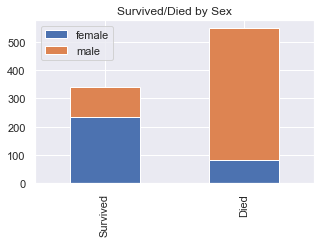

In [6]:
#-------------------Survived/Died by SEX------------------------------------

Survived = dataset[dataset.Survived == 1]['Sex'].value_counts()
Died = dataset[dataset.Survived == 0]['Sex'].value_counts()
df_sex = pd.DataFrame([Survived , Died])
df_sex.index = ['Survived','Died']
df_sex.plot(kind='bar',stacked=True, figsize=(5,3), title="Survived/Died by Sex")

female_survived= df_sex.female[0]/df_sex.female.sum()*100
male_survived = df_sex.male[0]/df_sex.male.sum()*100
print("Percentage of female that survived:" ,round(female_survived), "%")
print("Percentage of male that survived:" ,round(male_survived), "%")

# display table
from IPython.display import display
display(df_sex)

Percentage of Embark S that survived: 34.0 %
Percentage of Embark C that survived: 55.0 %
Percentage of Embark Q that survived: 39.0 %


,S,C,Q
Survived,217,93,30
Died,427,75,47


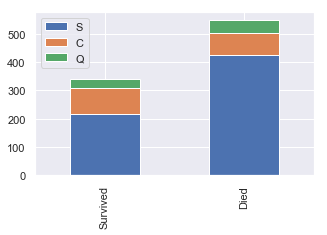

In [7]:
#-------------------- Survived/Died by Embarked ----------------------------


survived_embark = dataset[dataset['Survived']==1]['Embarked'].value_counts()
dead_embark = dataset[dataset['Survived']==0]['Embarked'].value_counts()
df_embark = pd.DataFrame([survived_embark,dead_embark])
df_embark.index = ['Survived','Died']
df_embark.plot(kind='bar',stacked=True, figsize=(5,3))

Embark_S= df_embark.iloc[0,0]/df_embark.iloc[:,0].sum()*100
Embark_C = df_embark.iloc[0,1]/df_embark.iloc[:,1].sum()*100
Embark_Q = df_embark.iloc[0,2]/df_embark.iloc[:,2].sum()*100
print("Percentage of Embark S that survived:", round(Embark_S), "%")
print("Percentage of Embark C that survived:" ,round(Embark_C), "%")
print("Percentage of Embark Q that survived:" ,round(Embark_Q), "%")

from IPython.display import display
display(df_embark)

In [8]:
X = dataset.drop(['PassengerId','Cabin','Ticket','Fare', 'Parch', 'SibSp'], axis=1)
y = X.Survived                       # vector of labels (dependent variable)
X=X.drop(['Survived'], axis=1)       # remove the dependent variable from the dataframe X

X.head(20)

,Pclass,Name,Sex,Age,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,C
2,3,"Heikkinen, Miss. Laina",female,26.0,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,S
4,3,"Allen, Mr. William Henry",male,35.0,S
5,3,"Moran, Mr. James",male,NaN,Q
6,1,"McCarthy, Mr. Timothy J",male,54.0,S
7,3,"Palsson, Master. Gosta Leonard",male,2.0,S
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,S
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,C


In [14]:
# ----------------- Encoding categorical data -------------------------

# encode "Sex"
from sklearn.preprocessing import LabelEncoder
labelEncoder_X = LabelEncoder()
X.Sex=labelEncoder_X.fit_transform(X.Sex)

# encode "Embarked"

# number of null values in embarked:
print ('Number of null values in Embarked:', sum(X.Embarked.isnull()))

# fill the two values with one of the options (S, C or Q)
row_index = X.Embarked.isnull()
X.loc[row_index,'Embarked']='S' 

Embarked  = pd.get_dummies(  X.Embarked , prefix='Embarked'  )
X = X.drop(['Embarked'], axis=1)
X= pd.concat([X, Embarked], axis=1)  
# we should drop one of the columns
X = X.drop(['Embarked_S'], axis=1)

X.head()

Number of null values in Embarked: 0


,Pclass,Name,Sex,Age,Embarked_C,Embarked_Q
0,3,"Braund, Mr. Owen Harris",1,22.0,0,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0
2,3,"Heikkinen, Miss. Laina",0,26.0,0,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,0,0
4,3,"Allen, Mr. William Henry",1,35.0,0,0


Number of null values in Age: 177


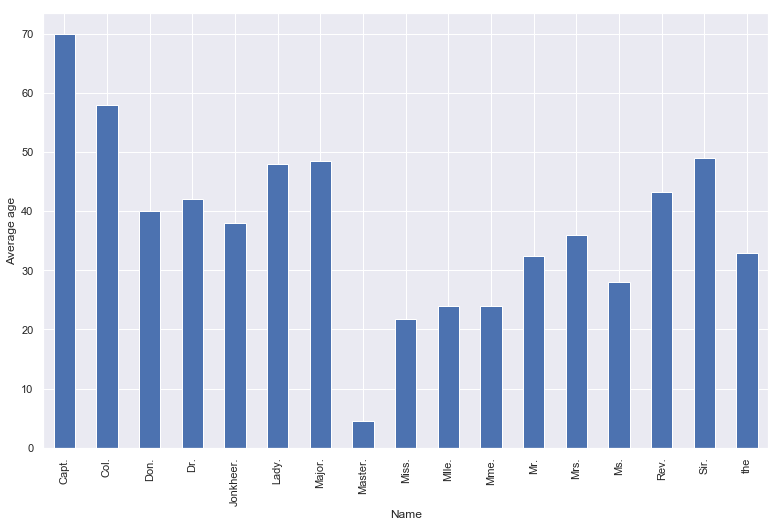

In [18]:
print ('Number of null values in Age:', sum(X.Age.isnull()))
 

# -------- Change Name -> Title ----------------------------
got= dataset.Name.str.split(',').str[1]
X.iloc[:,1]=pd.DataFrame(got).Name.str.split('\s+').str[1]
# ---------------------------------------------------------- 


#------------------ Average Age per title -------------------------------------------------------------
ax = plt.subplot()
ax.set_ylabel('Average age')
X.groupby('Name').mean()['Age'].plot(kind='bar',figsize=(13,8), ax = ax)

title_mean_age=[]
title_mean_age.append(list(set(X.Name)))  #set for unique values of the title, and transform into list
title_mean_age.append(X.groupby('Name').Age.mean())
title_mean_age
#------------------------------------------------------------------------------------------------------


#------------------ Fill the missing Ages ---------------------------
n_traning= dataset.shape[0]   #number of rows
n_titles= len(title_mean_age[1])
for i in range(0, n_traning):
    if np.isnan(X.Age[i])==True:
        for j in range(0, n_titles):
            if X.Name[i] == title_mean_age[0][j]:
                X.Age[i] = title_mean_age[1][j]
#--------------------------------------------------------------------    

X=X.drop(['Name'], axis=1)


In [25]:
for i in range(0, n_traning):
    if X.Age[i] > 18:
        X.Age[i]= 0
    else:
        X.Age[i]= 1

X.head()

,Pclass,Sex,Age,Embarked_C,Embarked_Q
0,3,1,0.0,0,0
1,1,0,0.0,1,0
2,3,0,0.0,0,0
3,1,0,0.0,0,0
4,3,1,0.0,0,0


In [26]:
#-----------------------Logistic Regression---------------------------------------------
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty='l2',random_state = 0)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X , y=y , cv = 10)
print("Logistic Regression:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std(),"\n")


Logistic Regression:
 Accuracy: 0.7811678583588695 +/- 0.02594150466779637 



In [36]:
#-----------------------------------K-NN --------------------------------------------------

# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 2)


# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X , y=y , cv = 10)
print("K-NN:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std(),"\n")


K-NN:
 Accuracy: 0.8103200544773579 +/- 0.031150858002374392 



In [38]:
#---------------------------------------SVM -------------------------------------------------

# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X , y=y , cv = 10)
print("SVM:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std(),"\n")


SVM:
 Accuracy: 0.7855873340143003 +/- 0.026622568318719446 



In [39]:
#---------------------------------Naive Bayes-------------------------------------------

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X , y=y , cv = 10)
print("Naive Bayes:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std(),"\n")


Naive Bayes:
 Accuracy: 0.7767744864374079 +/- 0.02617976826959799 



In [40]:
#----------------------------Random Forest------------------------------------------

# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X , y=y , cv = 10)
print("Random Forest:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std())


Random Forest:
 Accuracy: 0.8137033253887186 +/- 0.031741002619065845


In [65]:
testset= pd.read_csv(r'C:\Users\sat\Desktop\Untitled Folder\titanic\test.csv')

# dropping the unwanted
X_test = testset.drop(['PassengerId','Cabin','Ticket','Fare', 'Parch', 'SibSp'], axis=1)
# y_test = X_test.Survived                       # vector of labels (dependent variable)
# X=X.drop(['Survived'], axis=1)       # remove the dependent variable from the dataframe X

# X_test.head(20)

# ----------------- Encoding categorical data -------------------------

# encode "Sex"
from sklearn.preprocessing import LabelEncoder
labelEncoder_X_test = LabelEncoder()
X_test.Sex=labelEncoder_X_test.fit_transform(X_test.Sex)

# encode "Embarked"

# number of null values in embarked:
print ('Number of null values in Embarked:', sum(X_test.Embarked.isnull()))

# fill the two values with one of the options (S, C or Q)
row_index = X_test.Embarked.isnull()
X_test.loc[row_index,'Embarked']='S' 

Embarked  = pd.get_dummies(  X_test.Embarked , prefix='Embarked'  )
X_test = X_test.drop(['Embarked'], axis=1)
X_test= pd.concat([X_test, Embarked], axis=1)  
# we should drop one of the columns
X_test = X_test.drop(['Embarked_S'], axis=1)

print ('Number of null values in Age:', sum(X_test.Age.isnull()))
 

# -------- Change Name -> Title ----------------------------
got_test= testset.Name.str.split(',').str[1]
X_test.iloc[:,1]=pd.DataFrame(got_test).Name.str.split('\s+').str[1]
# ---------------------------------------------------------- 


# #------------------ Average Age per title -------------------------------------------------------------
# ax_test = plt.subplot()
# ax_test.set_ylabel('Average age')
# X_test.groupby('Name').mean()['Age'].plot(kind='bar',figsize=(13,8), ax = ax_test)

# title_mean_age=[]
# title_mean_age.append(list(set(X_test.Name)))  #set for unique values of the title, and transform into list
# title_mean_age.append(X_test.groupby('Name').Age.mean())
# title_mean_age
# #------------------------------------------------------------------------------------------------------


#------------------ Fill the missing Ages ---------------------------
n_testing= testset.shape[0]   #number of rows
n_titles= len(title_mean_age[1])
n_titles
for i in range(0, n_testing):
    if np.isnan(X_test.Age[i])==True:
        for j in range(0, n_titles):
            if X_test.Name[i] == title_mean_age[0][j]:
                X_test.Age[i] = title_mean_age[1][j]
#--------------------------------------------------------------------    

X_test=X_test.drop(['Name'], axis=1)
X_test

Number of null values in Embarked: 0
Number of null values in Age: 86


,Pclass,Sex,Age,Embarked_C,Embarked_Q
0,3,1,34.5,0,1
1,3,0,47.0,0,0
2,2,1,62.0,0,1
3,3,1,27.0,0,0
4,3,0,22.0,0,0
5,3,1,14.0,0,0
6,3,0,30.0,0,1
7,2,1,26.0,0,0
8,3,0,18.0,1,0
9,3,1,21.0,0,0


In [66]:
print ('Number of null values in Age:', sum(X_test.Age.isnull()))

for i in range(0, n_testing):
    if X_test.Age[i] > 18:
        X_test.Age[i]= 0
    else:
        X_test.Age[i]= 1

X_test

Number of null values in Age: 0


,Pclass,Sex,Age,Embarked_C,Embarked_Q
0,3,1,0.0,0,1
1,3,0,0.0,0,0
2,2,1,0.0,0,1
3,3,1,0.0,0,0
4,3,0,0.0,0,0
5,3,1,1.0,0,0
6,3,0,0.0,0,1
7,2,1,0.0,0,0
8,3,0,1.0,1,0
9,3,1,0.0,0,0


In [72]:
#----------------------------Random Forest------------------------------------------

# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X , y=y , cv = 10)
print("Random Forest:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std())


classifier.fit(X=X , y=y)
y_test = classifier.predict(X_test)

Random Forest:
 Accuracy: 0.8137033253887186 +/- 0.031741002619065845


In [70]:
help(classifier.fit)

Help on method fit in module sklearn.ensemble.forest:

fit(X, y, sample_weight=None) method of sklearn.ensemble.forest.RandomForestClassifier instance
    Build a forest of trees from the training set (X, y).
    
    Parameters
    ----------
    X : array-like or sparse matrix of shape = [n_samples, n_features]
        The training input samples. Internally, its dtype will be converted
        to ``dtype=np.float32``. If a sparse matrix is provided, it will be
        converted into a sparse ``csc_matrix``.
    
    y : array-like, shape = [n_samples] or [n_samples, n_outputs]
        The target values (class labels in classification, real numbers in
        regression).
    
    sample_weight : array-like, shape = [n_samples] or None
        Sample weights. If None, then samples are equally weighted. Splits
        that would create child nodes with net zero or negative weight are
        ignored while searching for a split in each node. In the case of
        classification, splits